##**Classification: Predicting the hours of Employee Absenteeism**

This is the second project of edwisor Data Science career path.

This project is supervised learning classification problem.
The goal is to predict the number of hours an employee can absent and explore the factor that have good correlation  with high rate of absenteeism.

The data provided belongs to a courier company. For a high paced business enviornment customer sataisfaction is the first priority and it is mainly based on the performance of an employee. Employee with low performance leads to the dissatisfaction of customers which in turn effects the revenue of the company and absenteeism is one of the reasons.Excessive absence can seriously effect the organization and it can lead to low productivity and higher costs. So, the factors that causes the absenteeism are need to be addressed and certain measures should be taken to rectify them. This project targets the factors that mostly effects the employee performace. 

The data contains information related to employee health, drinking habit, smoking habit, number of childern they have, how much they expend on transportation, their age etc. Our aim is to study these attributes and how they related to an employee's performance.

This analysis leads to the better understanding of the factors and help the organization human resource department to improve the process by taking steps which can minimize these factors.



## Intialization

Importing the required libraries

The given data have 740 observations and 21 features.

The featues are as following:-

Feature| Description
------------ | -------------
ID                               | Id of the Employee
Reason for absence               | Reason given by employee. Ex. health issue, family related reasons etc.
Month of absence                 | Month 
Day of the week                  | Weekdays from Monday to Saturday
Seasons                          | Season
Transportation expense           | How much they spend on travelling from home to work
Distance from Residence to Work  | Distance from residence to work in km 
Service time                     | Service time
Age                              | Age of the Employee
Work load Average/day            | Employee daily average workload
Hit target                       | Hit target
Disciplinary failure             | If the employee have any disciplinary issue in the past.
Education                        | Employee highest eduction 
Son                              | Number of children they have
Social drinker                   | If an employee drink or not
Social smoker                    | if an employee smoke or not
Pet                              | Number of pets they have
Weight                           | Weight of an Employee
Height                           | Height of an Employee
Body mass index                  | Body mass index calculated as weight/(height<sup>2</sup>)
Absenteeism time in hours        | The Number of hours an employee was absent

Absenteesism time in hours is our target variable.


In [1]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Importing data

EmpAb = pd.read_excel("https://s3-ap-southeast-1.amazonaws.com/edwisor-india-bucket/projects/data/DataN0101/Absenteeism_at_work_Project.xls")

In [3]:
EmpAb.shape

(740, 21)

In [4]:
EmpAb.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [5]:
EmpAb.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,734.000000,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,94.587193,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,3.792705,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [6]:
EmpAb.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [7]:
EmpAb.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [8]:
EmpAb

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14.0,7.0,3,1,289.0,36.0,13.0,33.0,264604.0,93.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,8.0
736,1,11.0,7.0,3,1,235.0,11.0,14.0,37.0,264604.0,93.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,4.0
737,4,0.0,0.0,3,1,118.0,14.0,13.0,40.0,271219.0,95.0,0.0,1.0,1.0,1.0,0.0,8.0,98.0,170.0,34.0,0.0
738,8,0.0,0.0,4,2,231.0,35.0,14.0,39.0,271219.0,95.0,0.0,1.0,2.0,1.0,0.0,2.0,100.0,170.0,35.0,0.0


## Data Preparation

Before doing any analysis we need prepare the data for better understanding

First we need to identify the categorical and continous features and separate them.

The numerical values of categorical features should be replaced with respective values.

- Changing values in reason of absence.
 - 1: Certain infectious and parasitic diseases
 - 2: Neoplasms
 - 3: Diseases of the blood and blood-forming organs and certain disorders involving the
immune mechanism
 - 4: Endocrine, nutritional and metabolic diseases
 - 5: Mental and behavioural disorders
 - 6: Diseases of the nervous system
 - 7: Diseases of the eye and adnexa
 - 8: Diseases of the ear and mastoid process
 - 9: Diseases of the circulatory system
 - 10: Diseases of the respiratory system
 - 11: Diseases of the digestive system
 - 12: Diseases of the skin and subcutaneous tissue
 - 13: Diseases of the musculoskeletal system and connective tissue
 - 14: Diseases of the genitourinary system
 - 15: Pregnancy, childbirth and the puerperium
 - 16: Certain conditions originating in the perinatal period
 - 17: Congenital malformations, deformations and chromosomal abnormalities
 - 18: Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere
classified
 - 19: Injury, poisoning and certain other consequences of external causes
 - 20: External causes of morbidity and mortality
 - 21: Factors influencing health status and contact with health services.

- Replacing 1, 2, 3, 4 in Seasons feature to 
 - 1: Summer
 - 2: Autumn
 - 3: Winter
 - 4: Spring

- Replacing 1, 2, 3, 4 in Education feature to 
 - 1: High School
 - 2: Graduate
 - 3: Postgraduate
 - 4: Master and Doctor

In [0]:
Categorical = ['ID','Reason for absence','Month of absence','Day of the week',
               'Seasons','Son','Pet','Disciplinary failure','Education',
               'Social drinker','Social smoker']

Continuous = ['Transportation expense','Distance from Residence to Work',
              'Service time','Age','Work load Average/day ','Hit target','Weight',
              'Height','Body mass index','Absenteeism time in hours']

#Separating variables into categorical and continuous 

In [0]:
#Copying the data into new dataset for data analysis

data = EmpAb.copy()

data['ID'] = data['ID'].astype('category')

data['Reason for absence'] = data['Reason for absence'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],
                                                                  ['Undefined absence',
                                                                   'Certain infectious and parasitic diseases',
                                                                   'Neoplasms',
                                                                   'Diseases of the blood, blood-forming organs and immune mechanism disorders',
                                                                   'Endocrine, nutritional and metabolic diseases',
                                                                   'Mental and behavioural disorders',
                                                                   'Diseases of the nervous system',
                                                                   'Diseases of the eye and adnexa',
                                                                   'Diseases of the ear and mastoid process',
                                                                   'Diseases of the circulatory system',
                                                                   'Diseases of the respiratory system',
                                                                   'Diseases of the digestive system',
                                                                   'Diseases of the skin and subcutaneous tissue',
                                                                   'Diseases of the musculoskeletal system and connective tissue',
                                                                   'Diseases of the genitourinary system',
                                                                   'Pregnancy, childbirth and the puerperium',
                                                                   'Certain conditions originating in the perinatal period',
                                                                   'Congenital malformations, deformations and chromosomal abnormalities',
                                                                   'Symptoms, signs, abnormal clinical and laboratory findings, not elsewhere classified',
                                                                   'Injury, poisoning and certain other consequences of external causes',
                                                                   'External causes of morbidity and mortality',
                                                                   'Factors influencing health status and contact with health services',
                                                                   'patient follow-up',
                                                                   'medical consultation',
                                                                   'blood donation',
                                                                   'laboratory examination',
                                                                   'unjustified absence',
                                                                   'physiotherapy',
                                                                   'dental consultation']).astype('category')

data['Month of absence'] = data['Month of absence'].astype('category')

data['Day of the week'] = data['Day of the week'].replace([2,3,4,5,6],
                                                            ['Monday',
                                                             'Tuesday',
                                                             'Wednesday',
                                                             'Thrusday',
                                                             'Friday']).astype('category')

data['Seasons'] = data['Seasons'].replace([1,2,3,4],
                                            ['Summer',
                                             'Autumn',
                                             'Winter',
                                             'Spring']).astype('category')

data['Disciplinary failure'] = data['Disciplinary failure'].replace([0,1],
                                                                      ['No',
                                                                       'Yes']).astype('category')

data['Education'] = data['Education'].replace([1,2,3,4],
                                                ['High School',
                                                 'Graduate',
                                                 'Postgraduate',
                                                 'Master and Doctor']).astype('category')

data['Social drinker'] = data['Social drinker'].replace([0,1],
                                                          ['No',
                                                           'Yes']).astype('category')

data['Social smoker'] = data['Social smoker'].replace([0,1],
                                                        ['No',
                                                         'Yes']).astype('category')

data['Son'] = data['Son'].astype('category')

data['Pet'] = data['Pet'].astype('category')



## Exploratory data analysis

In this part we extract the insights from the data to discover patters and summerize the data using different statistical visualization techniques like bargraphs, dotplots etc.

Analysis done:-
- Employee ID wise:-
 - Number of leaves taken by each employee.
 - Total number of hours absent of each employee.
 - Absent hours vs Social Drinking and Smoking Habits.
 - Comparison if a employee absence hours are related to their highest education.
- Number of times a particular reason given for leave and total hours of absence for a specific reason.
- Monthly number of leaves applied and total hours of leaves for each month.
- Number of leaves and total number of hours of absence weekday wise.
- Season related leaves applied and total hours of absence related to a particular season.
- If rate of absenteeism is related to disciplinary failure.
- How long and frequently employees took leaves related to the number of children and number of pets they have.
- Age wise leaves frequency and total number of hours absence.







#### ID

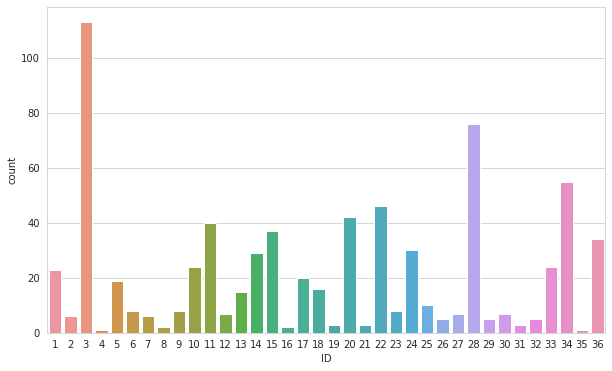

In [11]:
#Plotting the number of leaves took by particular person given ID

sns.set_style("whitegrid")
plt.gcf().set_size_inches(10,6)
sns.countplot(data=data,x='ID',)



Employee with ID 3 and 28 took most no. of leaves

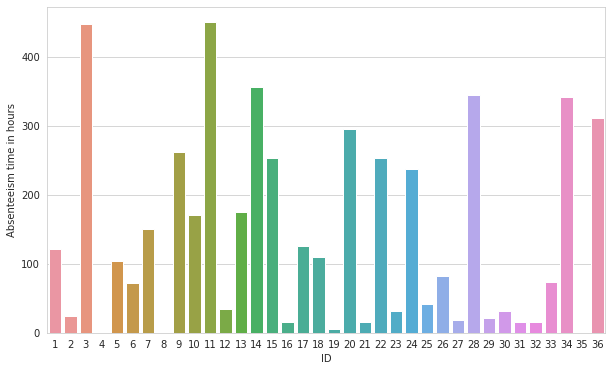

In [12]:
plt.gcf().set_size_inches(10,6)
sns.barplot(data=data,x='ID',y='Absenteeism time in hours',ci = None,estimator=sum)

But when adding the total hours of each id we can see that employee with ID 9, 11, 14, 15, 20, 34, 36 were absent for less number of times but for long hours.

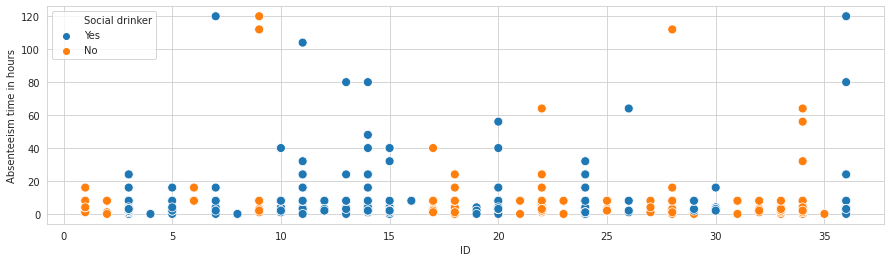

In [13]:
#Employee Absent in hours ID wise and wether employee is drinker or not

plt.gcf().set_size_inches(15,4)
sns.scatterplot(data=data,x='ID',y='Absenteeism time in hours',hue = 'Social drinker',s=80)

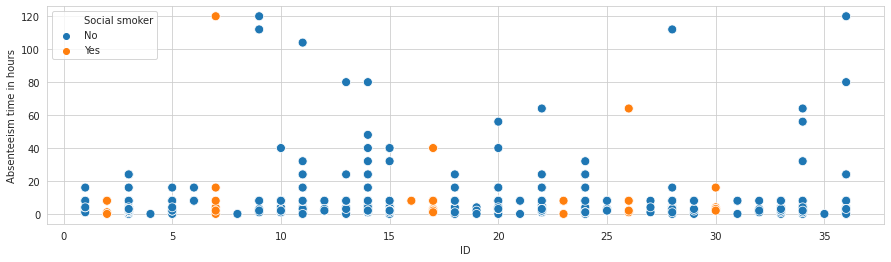

In [14]:
#Employee Absent in hours ID wise and wether employee is smoker or not

plt.gcf().set_size_inches(15,4)
sns.scatterplot(data=data,x='ID',y='Absenteeism time in hours',
                hue = 'Social smoker',s=80)

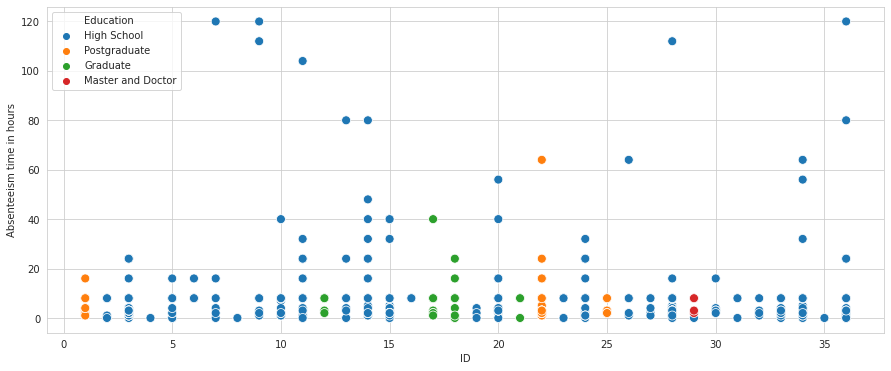

In [15]:
#Employee Absent in hours ID wise and whats is their educational qualification

plt.gcf().set_size_inches(15,6)
sns.scatterplot(data=data,x='ID',y='Absenteeism time in hours',
                hue= 'Education',s=80)

#### Reason for absence

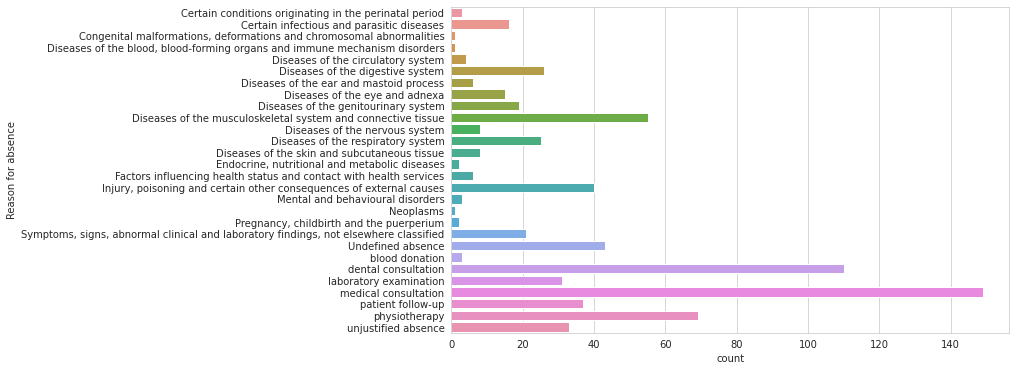

In [16]:
#Plotting the number of reason for absence

#plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,6)
sns.countplot(data=data,y='Reason for absence')



Mostly people took leave for medical consulation, Dental Consulation and physiotherapy

And people with muscloskeletal (joint pain) also too significant leaves

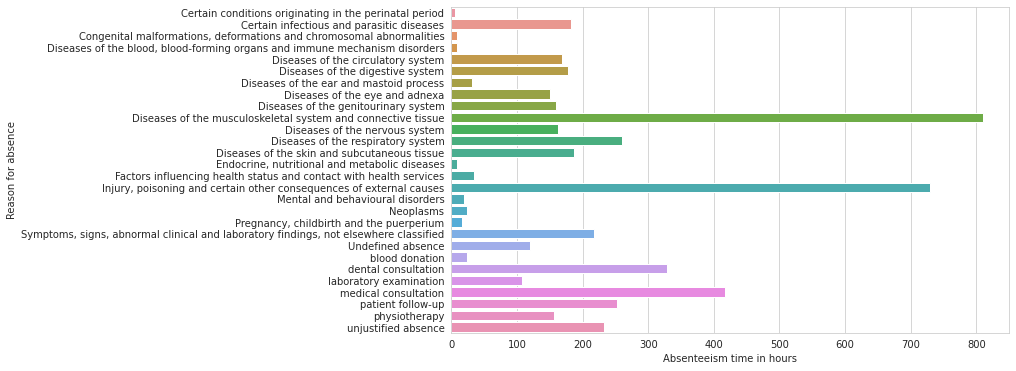

In [17]:
#distribution of Reason of absence with Absenteeism time in hours
#getting total no. of hours absent per reason

plt.gcf().set_size_inches(10,6)
sns.barplot(data=data,y='Reason for absence',x='Absenteeism time in hours',ci = None,estimator=sum)

Here people having problem with musculoskeletal system (Joints pain) took long hours leaves followed by external causes

#### Month of absence

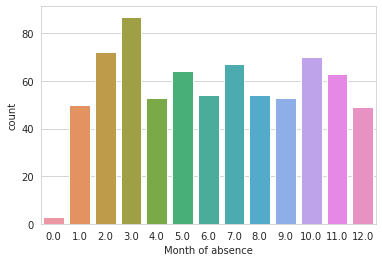

In [18]:
#No. of emoployee absent month wise

sns.countplot(data=data,x='Month of absence')

#People took leave mostly in 3rd month

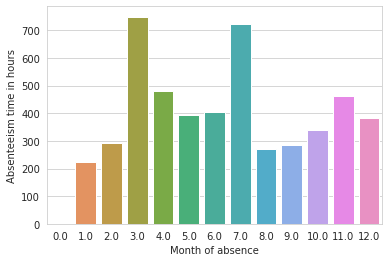

In [19]:
#Total no. of hours absence month wise

sns.barplot(data=data,x='Month of absence',y='Absenteeism time in hours',ci = None,estimator=sum)

#Employees took long leaves in 7th month also

#### Day of the week

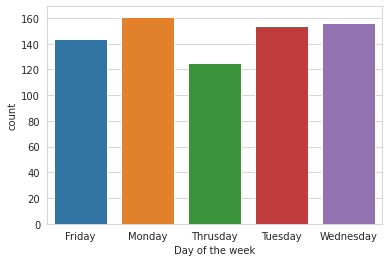

In [20]:
#Frequency of weekdays

sns.countplot(data=data,x='Day of the week')

#Employees were absent mostly on mondays and tuesdays

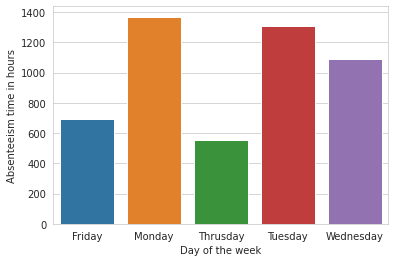

In [21]:
#Total no. of hours absent per weekday 

sns.barplot(data=data,x='Day of the week',y='Absenteeism time in hours',ci = None,estimator=sum)

#same as frequency people were absent mostly on monday and tuesday for long hours

#### Seasons

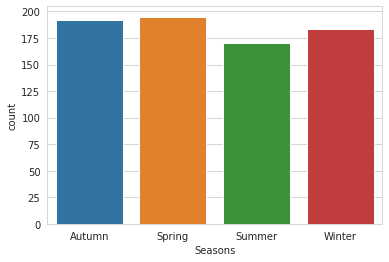

In [22]:
#Frequency of leaves season wise

sns.countplot(data=data,x='Seasons')

#people took most of leaves in spring season 

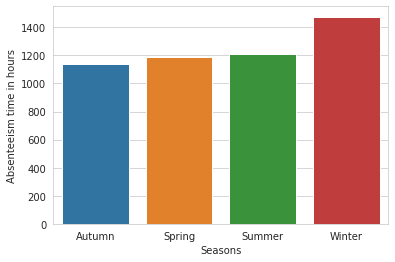

In [23]:
#Total no. of hours absent season wise

sns.barplot(data=data,x='Seasons',y='Absenteeism time in hours',ci = None,estimator=sum)

#From above an below graph we can conclude that
#Employees took small hours leave in spring and autumn but long hours leave in winter

#### Disciplinary failure

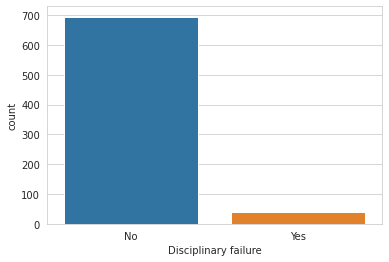

In [24]:
#Count plot of dispilinary failure

sns.countplot(data=data,x='Disciplinary failure')
plt.show()
#there is very less no. of people with disciplinary failure

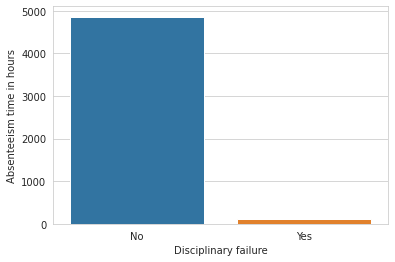

In [25]:
#Disciplinary failure with absence hours plot

sns.barplot(data=data,x='Disciplinary failure',y='Absenteeism time in hours',ci = None,estimator=sum)

#It seems people with no disciplinary failure were more absent

#### Education

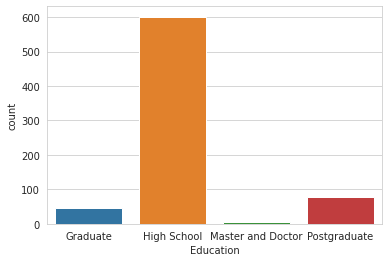

In [26]:
#No. of leaves took education wise


sns.countplot(data=data,x='Education')

#Mostly employee with high school education took more leaves

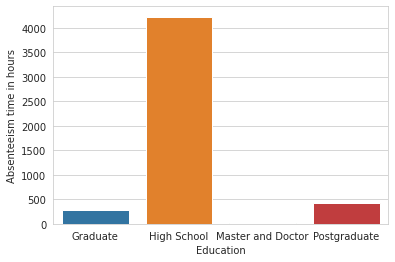

In [27]:
#Total no. of hours absent education wise

sns.barplot(data=data,x='Education',y='Absenteeism time in hours',ci = None,estimator = sum)

#High school qualified emploees were mostly absent

#### Social drinker

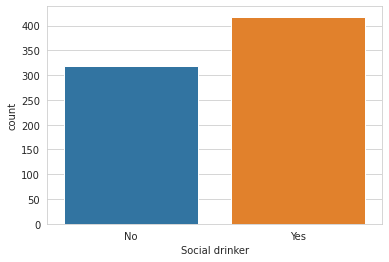

In [28]:
#counts of social driker took leaves 

sns.countplot(data=data,x='Social drinker')

#Here people with social drinking habit was absent more times

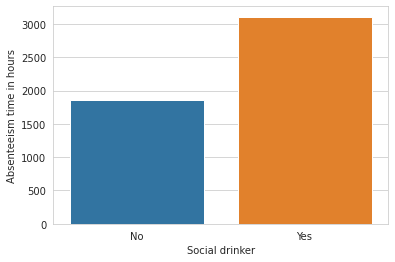

In [29]:
#Absent hours plot with Social drinker 

sns.barplot(data=data,x='Social drinker',y='Absenteeism time in hours',ci = None,estimator = sum)

#Mostly people with drinking habit was absent for longer period of time

#### Social smoker

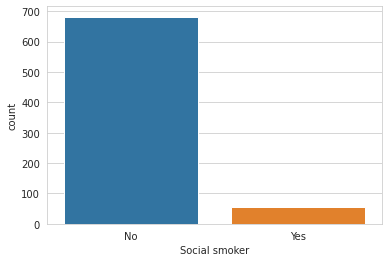

In [30]:
#Plot of social smoker

sns.countplot(data=data,x='Social smoker')

#seems like there is very few no. of people with smoking habit

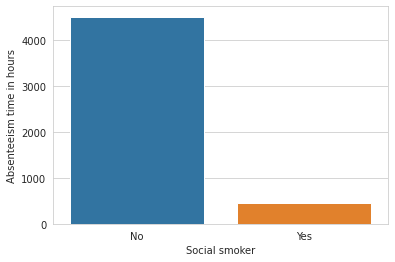

In [31]:
#Plot of Social smoker with absent hours

sns.barplot(data=data,x='Social smoker',y='Absenteeism time in hours',ci = None,estimator = sum)

#Here people with no smoking habit took long hours of leave

#### Son

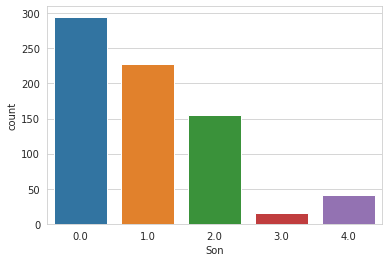

In [32]:
#Frequency of leaves taken by employees acc to no. of son they have

sns.countplot(data=data,x='Son')

#People with no son took leaves more frequently

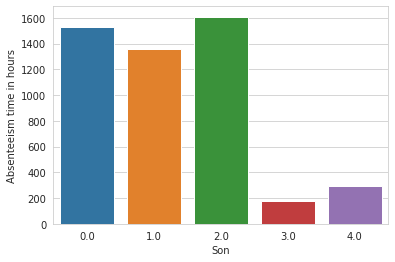

In [33]:
#Total no. of hours absent acc to no. of sons employees have

sns.barplot(data=data,x='Son',y='Absenteeism time in hours',ci = None,estimator = sum)

#Seems people with 2 and 0 Sons took long hours leave

In [34]:
for i in range(0,5):
    a = data[data['Son'] == i]
    print (i,a['Absenteeism time in hours'].sum())

0 1531.0
1 1361.0
2 1609.0
3 175.0
4 292.0


In [35]:
for i in range(0,5):
    a = data[data['Son'] == i]
    print (i,a['Absenteeism time in hours'].mean())

0 5.334494773519164
1 6.158371040723982
2 10.585526315789474
3 12.5
4 7.684210526315789


#### Pet

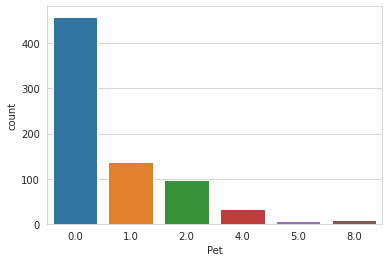

In [36]:
#Frequency of leaves taken by employees acc to no. of Pet they have

sns.countplot(data=data,x='Pet')

#People with no Pet took leaves more frequently

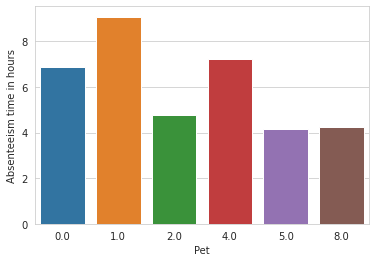

In [37]:
#Total no. of hours absent acc to no. of Pets employees have

sns.barplot(data=data,x='Pet',y='Absenteeism time in hours',ci = None)

#Seems people with 1 and 4 pets took long hours leave

#### Age

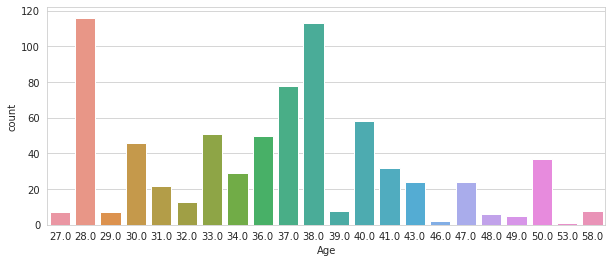

In [38]:
#Frequency of leaves taken by age

plt.gcf().set_size_inches(10,4)
sns.countplot(data=data,x='Age')

#Employee of age 28 and 38 took more frequent leaves

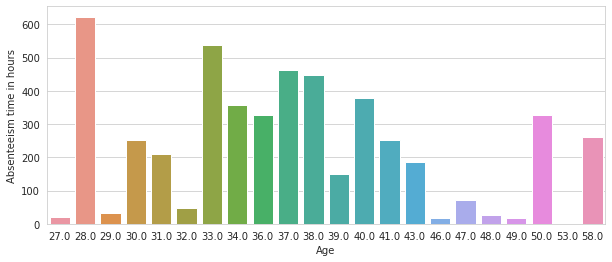

In [39]:
#Total no of hours absence by age

plt.gcf().set_size_inches(10,4)
sns.barplot(data=data,x='Age',y='Absenteeism time in hours',ci = None,estimator = sum)

#employees with 28 and 36 took long hours leave

#### Distribution of Continuous with Target variable




Distribution of :-

Transportation expense, 
Distance from Residence to Work, 
Service time, 
Age, 
Work load Average/day, 
Hit target, 
Weight, 
Heigh, 
Body mass index</br>

With

Absenteeism time in hours

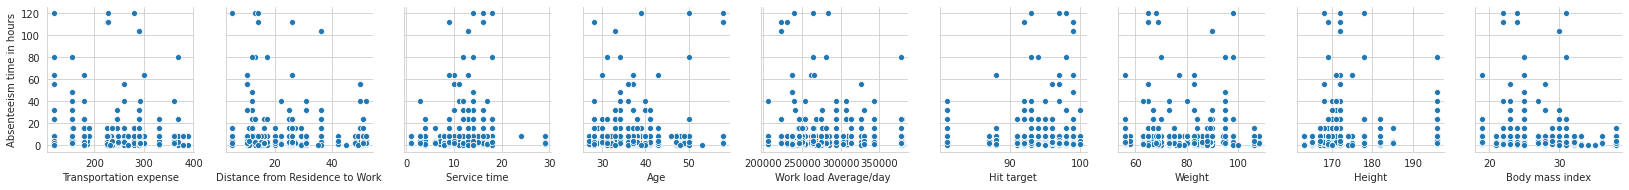

In [40]:
#Relation of continuous variable with target variable
sns.pairplot(data = data,
             x_vars = Continuous[0:-1],
             y_vars = Continuous[-1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f691eb75a20>,
      dtype=object)

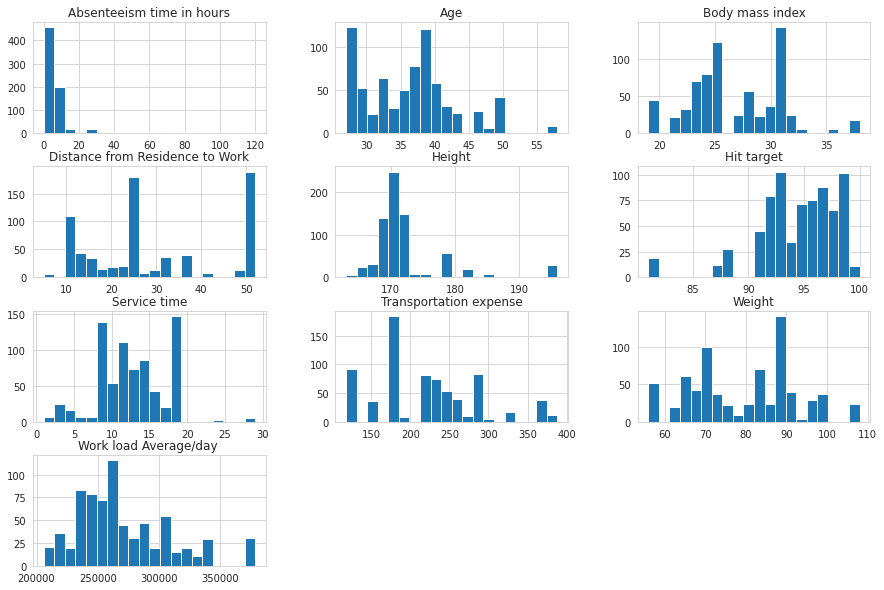

In [41]:
#Distribution of continuous variable
data[Continuous].hist(bins = 20,figsize = (15,10))

## Missing Value Analysis

Our data contains certain missing values, these values might have occured due to human error or if the data collection is not done properly. This missing data can create inaccurate results. So first these missing values should be taken care.

We need to first check if a feature have more than 30 percent of missing values, if so then we need to drop that feature. Then we checked if there is any value is equal to zero in 'Reason of absence', 'Month of absence' and 'Absentieeism time in hours beacuse the observations related to these features cannot be zero. 

Now to impute these missing values we can use mean, median or mode. Here mean is used to impute these values and for 'Body mass index' we have calculated the value using BMI formulae.


In [42]:
print(len(EmpAb[EmpAb['Reason for absence'] == 0]))
print(len(EmpAb[EmpAb['Month of absence'] == 0]))
print(len(EmpAb[EmpAb['Absenteeism time in hours'] == 0]))


#Here dataset have some values equal to zero in Reason for absence and month of absence
#These values cannot be zero
#So these values should be replace with NA and impute afterwards

43
3
36


In [0]:
EmpAb['Reason for absence'] = EmpAb['Reason for absence'].replace(0,np.nan)
EmpAb['Month of absence'] = EmpAb['Month of absence'].replace(0,np.nan)
EmpAb['Absenteeism time in hours'] = EmpAb['Absenteeism time in hours'].replace(0,np.nan)


#Replacing 0 with NaN in Reason for absence and Month of absence

In [44]:
missingValues = pd.DataFrame(EmpAb.isnull().sum(),columns = ['No. of missing values'])

for c in EmpAb.columns:
    missingValues.loc[c,'Percent'] = (EmpAb[c].isnull().sum()/len(EmpAb))*100

missingValues

#Checking the missing number and percentage of missing values

,No. of missing values,Percent
ID,0,0.000000
Reason for absence,46,6.216216
Month of absence,4,0.540541
Day of the week,0,0.000000
Seasons,0,0.000000
Transportation expense,7,0.945946
Distance from Residence to Work,3,0.405405
Service time,3,0.405405
Age,3,0.405405
Work load Average/day,10,1.351351


In [0]:
for col in Categorical:
    EmpAb[col] = EmpAb[col].fillna(EmpAb[col].mode().values[0])   

for col in Continuous:
    if col == 'Body mass index': continue
    EmpAb[col] = EmpAb[col].fillna(EmpAb[col].mean())
    
#Imputing missing values except 'Body mass index'
#Replacing categorical values with mode
#And replacing numerical values with mean


In [0]:
BMI = 'Body mass index'
EmpAb[BMI]=EmpAb[BMI].fillna(EmpAb['Weight']/np.square(EmpAb['Height']))

#'Body mass index' is filled using the BMI = Weight/(Height)^2

In [0]:
#Changing categorical datatype

for cat in Categorical:
    EmpAb[cat] = EmpAb[cat].astype('category')

In [48]:
EmpAb.isnull().sum().sum()

#Checking if any missing value left

0

In [0]:
#We can also use KNN imputation for missing value analysis

# from fancyimpute import KNN
# EmpAb = pd.DataFrame(KNN(k = 3).fit_transform(EmpAb), columns = EmpAb.columns)

# for cat in Categorical:
#     EmpAb[cat] = EmpAb[cat].round()
#     EmpAb[cat] = EmpAb[cat].astype('category')
    
#Changing datatypes of categorical variables

## Outlier Detection

Outliers are the extreme values which are far from the common obesrvations and mean of the data. These value can impact the model on a large scale and can effect the prediction accuracy to a large extend.

First we need to detect these outliers and remove them or impute them with meaningful values.



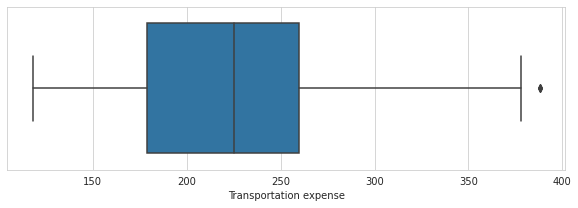

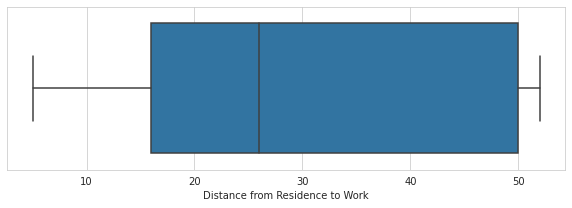

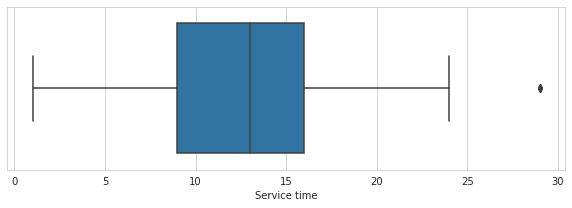

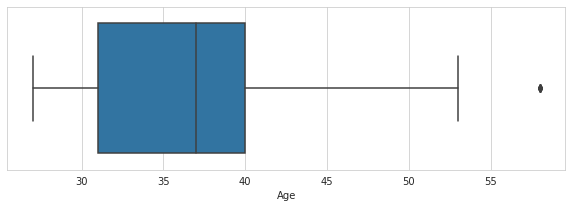

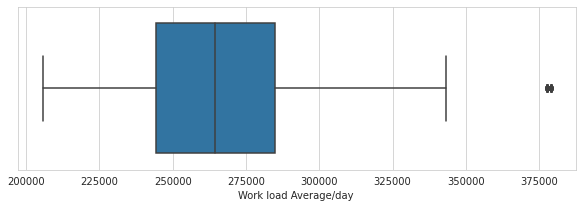

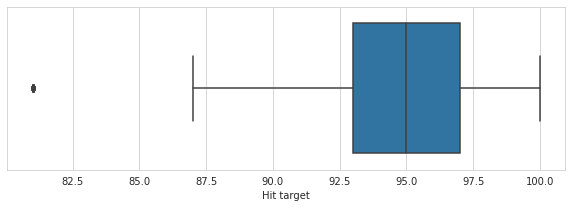

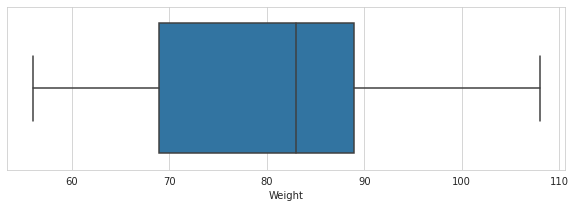

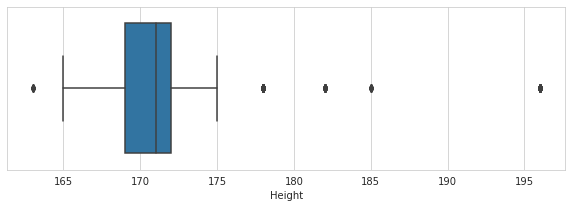

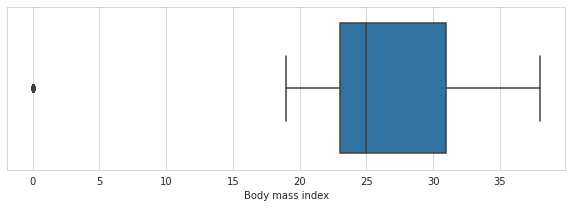

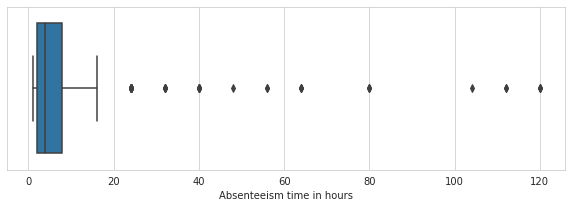

In [50]:
#Detection of outliers

for i in Continuous:
    plt.gcf().set_size_inches(10,3)
    sns.boxplot(data = EmpAb,x=i )
    plt.show()

## Outlier Removal

Quarantile method is used to remove outliers.

In [0]:
#creating dataset with outliers for further evaluation
EmpAbWithOutliers = EmpAb.copy()

In [0]:
#Removing outliers using quarentine method
#Replaing with NaN

for i in Continuous:
    q75,q25 = np.percentile(EmpAb[i],[75,25])
    iqr = q75-q25
    min_bar = (q25-(1.5*iqr))
    max_bar = (q75+(1.5*iqr))
    EmpAb.loc[EmpAb[i]<min_bar,i] = np.nan
    EmpAb.loc[EmpAb[i]>max_bar,i] = np.nan

In [0]:
#Filling values with mean

for col in Continuous:
    EmpAb[col] = EmpAb[col].fillna(EmpAb[col].mean())

In [54]:
#checking if any missing value left

EmpAb.isna().sum().sum()

0

In [0]:
#we can also use KNN to impute outlier values

# from fancyimpute import KNN
# EmpAb = pd.DataFrame(KNN(k = 3).fit_transform(EmpAb), columns = EmpAb.columns)

## Feature Selection

This is the most important part where the features that plays an important role in pridicting the target variable are separated form the less important variable.

From the heatmap distribution we can see that weight is highly correlated with Body mass index.



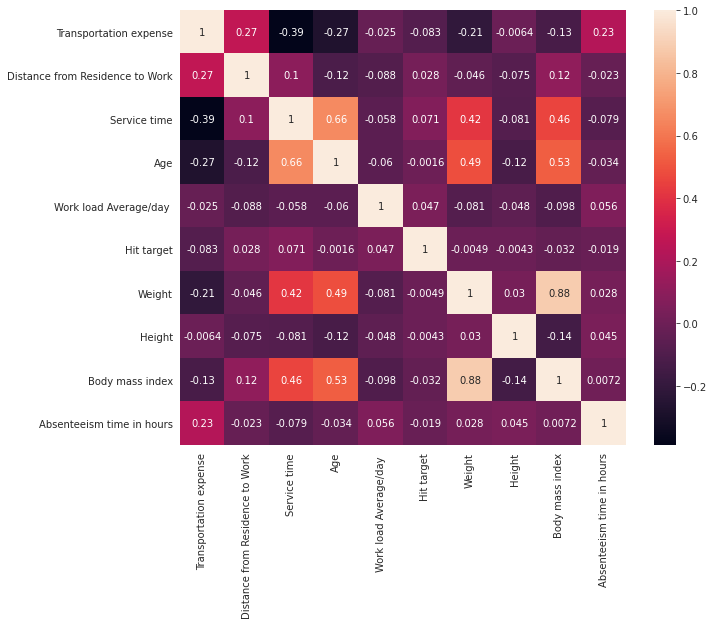

In [56]:
#Plotting corelational matrix of continuous variables

CorrMat = EmpAb[Continuous].corr()
plt.gcf().set_size_inches(10,8)
sns.heatmap(CorrMat,annot =True)

#Here we can see weight and body mass index are highly correlated so one variable need to be dropped

In [0]:
#Removing variable weight

EmpAb = EmpAb.drop(columns=['Weight'])
EmpAbWithOutliers = EmpAbWithOutliers.drop(columns=['Weight'])

# Continuous.remove('Weight')

## Feature Scaling

The data have very high difference in the obsevations of the features. For Ex. Average work is in thousands but age is in tens. so we need to first convert these values to a normal scale before feeding into machine learning algorithms.

To convert these values normalization technique is used in which minimum value is first subtracted form the observation and then divided by maximum value minus minimum of that feature. This reduced every observation in the data beteween 0 to 1. This is only done for the continuous features. 

In [0]:
#Normalizing the values of continuous variables

def DoNormalization(data):
    for var in Continuous:
        if var == 'Absenteeism time in hours' or var == 'Weight': continue
        data[var]=(data[var]-data[var].min())/((data[var].max())-(data[var].min()))
        
        return data
    
# EmpAb = DoNormalization(EmpAb)
# EmpAbWithOutliers = DoNormalization(EmpAbWithOutliers)

## Sampling

Dividing the data set into 80% training data and 20% test data.


In [0]:
#Functions to create normal sampling

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

def CreateSample(Data):
    Target = 'Absenteeism time in hours'
    InputData = Data.loc[:,Data.columns != Target]
    InputLabel = Data[Target]
    return train_test_split(InputData,InputLabel,test_size=0.2)

## Modelling

Now the clean, formatted and splitted data is fed to different machine learning algorithms to create a model which can predict the targeted value on new input data with higher accuracy. And different evaluation metrices is used to evaluate the predictive accuracy of these models.

Two functions are created for regression and classification modelling. But why regression modelling is required althought this is a classification problem?

In actual the target variable is not normally distributed in fact it have two peaks showing same frequency for two different values. 

So first the evaluation is done on the regression models and then the problem is converted to classification using the method called binning in which we create categories by dividing the values.

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
#Functions for moelling and evaluation for regression

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

modelsRegression = []
modelsRegression.append(('LR ',LinearRegression()))
modelsRegression.append(('DTR',DecisionTreeRegressor()))
modelsRegression.append(('RFR',RandomForestRegressor()))
modelsRegression.append(('KNN',KNeighborsRegressor()))
modelsRegression.append(('LSO',Lasso()))
#modelsRegression.append(('SVR',SVR()))


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def MAPE(actual,predicted): return np.mean((abs(actual-predicted))/actual)*100


def ModellingAndEvaluationRegression(xTrain,xTest,yTrain,yTest):
    MeanAbsoluteErrors = []
    MeanSquaredErrors = []
    RSquaredValue = []
    for name,model in modelsRegression:
        model.fit(xTrain,yTrain)
        predict = model.predict(xTest)
        MeanAbsoluteErrors.append((name,mean_absolute_error(yTest,predict)))
        MeanSquaredErrors.append((name,mean_squared_error(yTest,predict)))        
        RSquaredValue.append((name,r2_score(yTest,predict)))
        
    print('Mean Absolute Errors:-')
    for name, score in MeanAbsoluteErrors: print(name,':',score)
    
    print()        
    print('Mean Squared Errors:-')
    for name, score in MeanSquaredErrors: print(name,':',score)   
    
    print()
    print('R Squared Value:-')
    for name, score in RSquaredValue: print(name,':',score)

In [0]:
#Functions for moelling and evaluation for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

modelsClassification = []
modelsClassification.append(('LR ',LogisticRegression()))
modelsClassification.append(('DTC',DecisionTreeClassifier()))
modelsClassification.append(('RFC',RandomForestClassifier()))
modelsClassification.append(('KNN',KNeighborsClassifier()))
modelsClassification.append(('GNB',GaussianNB()))
#modelsClassification.append(('SGD',SGDClassifier()))
#modelsClassification.append(('SVC',SVC()))

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

def ModellingAndEvaluationClassification(xTrain,xTest,yTrain,yTest):
    ConfusionMatries = []
    AccuracyScores = []
    ClassificationReports = []
    for name,model in modelsClassification:
        model.fit(xTrain,yTrain)
        predict = model.predict(xTest)
        ConfusionMatries.append((name,confusion_matrix(yTest,predict)))
        AccuracyScores.append((name,accuracy_score(yTest,predict)))        
        ClassificationReports.append((name,classification_report(yTest,predict)))
        
    print('ConfusionMatrices:-')
    for name, score in ConfusionMatries:
        print(name,':')
        print(score)
        print()
        
    print('Accuracy Scores:-')        
    for name, score in AccuracyScores:
        print(name,':',score)   
    
    print()
    print('Classification Reports:-')    
    for name, score in ClassificationReports:
        print(name,':')
        print(score)
        print()

## Evaluation

### Performance matrices used for regression
- **Mean Absolute error** : It is the absolute sum of predicted values subtracted by actual values divided by total number of values, which tells how far are the predicted value from the actual values on an average.
- **Mean Squared Error** : It is the sum of square of actual values subtracted by predicted values and dividing 
- **R square** : This is also called as coefficient of determination, it shows how well the model fits on the data.
The value of R<sup>2</sup> ranges from 0 to 1 where value being near to 0 represents poor fitness and near to 1 represents good fitness of the model on the data.

### Performance matrices used for classification
- **Confusion Matrix** : A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

.|class1(predicted)|class2(predicted)
---| -----|----
class1(Actual)|TP|FN
class2(Actual)|FP|TN

- **MAccuracy ** : It is given by True positive plus True negative divided by total number of predictions i.e. total correct predictions divided by total number of predictions.

First the regression models are evaluated using above metrices but from the results we can see that the model is underfitting the data. The value of R<sup>2</sup> is even in negative which is even worse.

After checking with different techniques the problem is changed to binning and three seperate categories are created. And from the scores we can see that RandomForestClassifier is giving 72 percent of accuracy.


### Normal Evaluation

In [0]:
#Normal evaluation of dataset using regression
DataNrml = EmpAb.copy()

In [64]:
DataNrml = DoNormalization(DataNrml)
xTrain,xTest,yTrain,yTest = CreateSample(DataNrml)
ModellingAndEvaluationRegression(xTrain,xTest,yTrain,yTest)

Mean Absolute Errors:-
LR  : 2.0783329182442634
DTR : 1.8518927828353013
RFR : 1.9112827504242147
KNN : 2.466355725331983
LSO : 2.37713565728345

Mean Squared Errors:-
LR  : 7.385997215444191
DTR : 9.502415198387263
RFR : 7.017643575770504
KNN : 9.17812166803254
LSO : 8.274322076890405

R Squared Value:-
LR  : 0.19905203603928312
DTR : -0.030455317522067427
RFR : 0.23899682468572936
KNN : 0.00471153067550889
LSO : 0.10272083412340993


### Removing Variables

In [0]:
DataVar = EmpAb.copy()

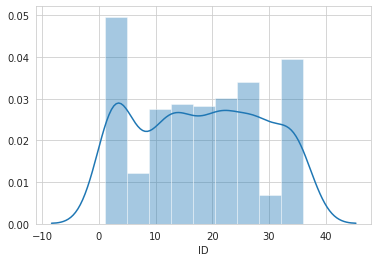

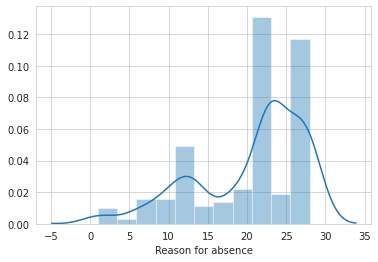

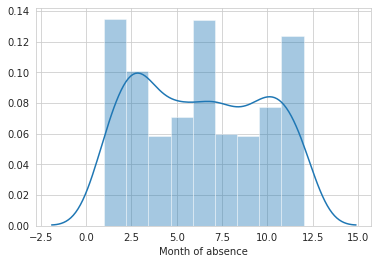

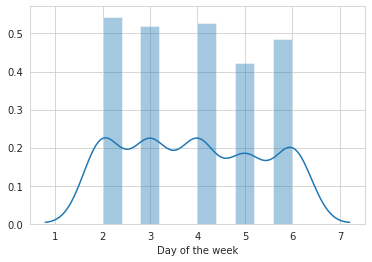

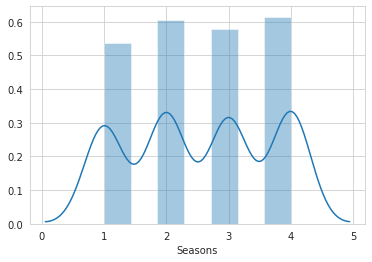

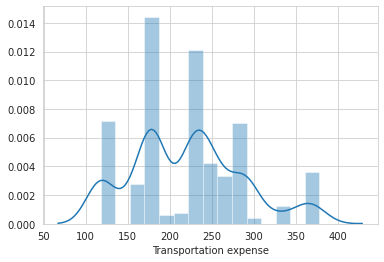

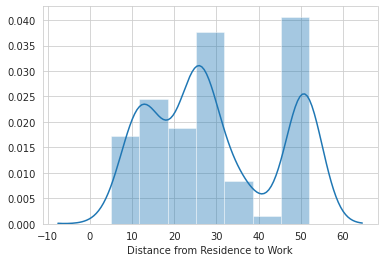

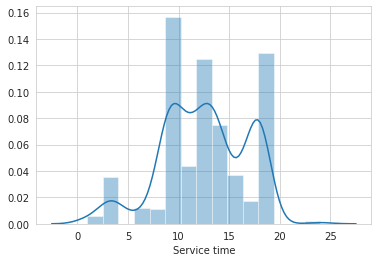

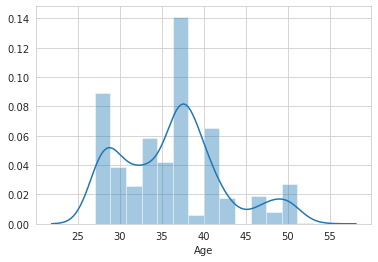

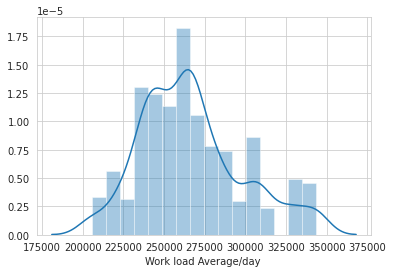

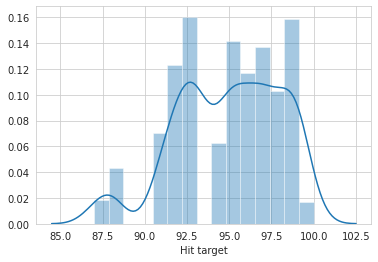

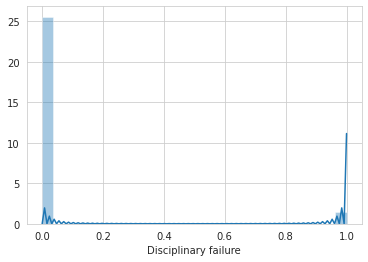

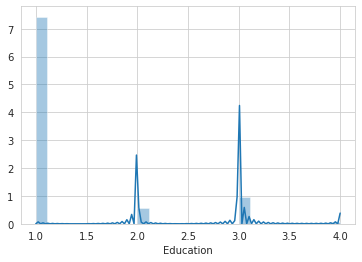

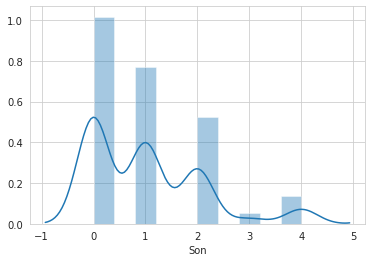

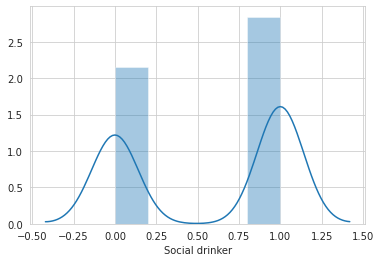

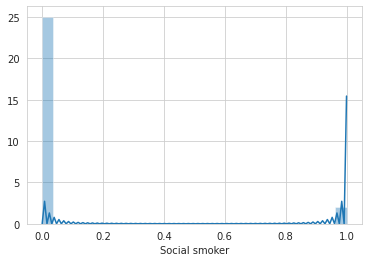

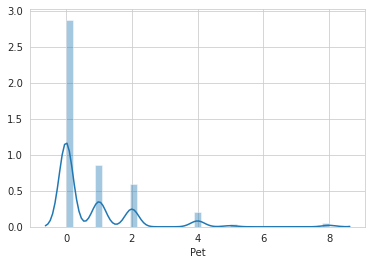

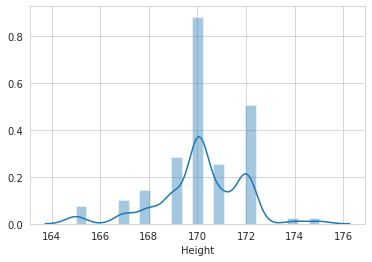

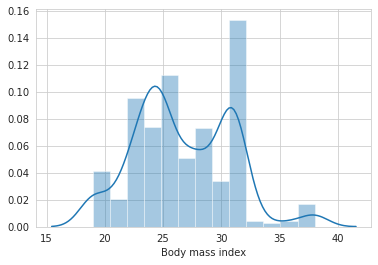

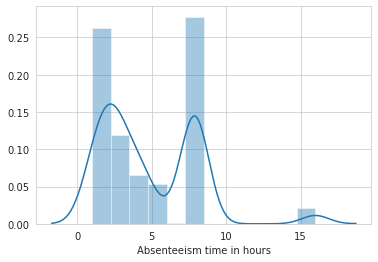

In [66]:
for i in DataVar.columns:
    sns.distplot(DataVar[i])
    plt.show()

In [0]:
#Removing some variable manually to which are non uniformally distributed

DataVar = DataVar.drop(columns= ['Seasons',
                                 'Disciplinary failure','Education',
                                 'Social drinker','Social smoker','Pet','Height'])

In [68]:
DataVar = DoNormalization(DataVar)
xTrain,xTest,yTrain,yTest = CreateSample(DataVar)
ModellingAndEvaluationRegression(xTrain,xTest,yTrain,yTest)

Mean Absolute Errors:-
LR  : 2.418285207259172
DTR : 2.4630688415920052
RFR : 2.1405806965387018
KNN : 2.916900076403941
LSO : 2.614083824820841

Mean Squared Errors:-
LR  : 10.233134657518425
DTR : 15.739903904567747
RFR : 9.641757496526484
KNN : 13.066572778624664
LSO : 10.73410594047951

R Squared Value:-
LR  : 0.1192138762580277
DTR : -0.3547646358772054
RFR : 0.1701148772447516
KNN : -0.12466574255636065
LSO : 0.07609428786278016


### Cube Root of Target Variable

In [0]:
DataCbrt = EmpAb.copy()

In [0]:
#Taking cuberoot of the target variable to get a nearly uniform distrbution curve

DataCbrt['Absenteeism time in hours'] = np.cbrt(DataCbrt['Absenteeism time in hours'])

In [71]:
DataCbrt = DoNormalization(DataCbrt)
xTrain,xTest,yTrain,yTest = CreateSample(DataCbrt)
ModellingAndEvaluationRegression(xTrain,xTest,yTrain,yTest)

Mean Absolute Errors:-
LR  : 0.269834422912137
DTR : 0.2724582090265711
RFR : 0.2352447989367356
KNN : 0.32648112445858957
LSO : 0.3413504122896808

Mean Squared Errors:-
LR  : 0.1164889245470199
DTR : 0.17189933246651318
RFR : 0.10049292235568211
KNN : 0.15316328122295655
LSO : 0.15243707129288542

R Squared Value:-
LR  : 0.23326805419535834
DTR : -0.1314441280756118
RFR : 0.3385539938926486
KNN : -0.008123142131844174
LSO : -0.0033432168736164947


### Changing to Classification

In [0]:
DataCls = EmpAbWithOutliers.copy()

In [0]:
DataCls = EmpAb.copy()

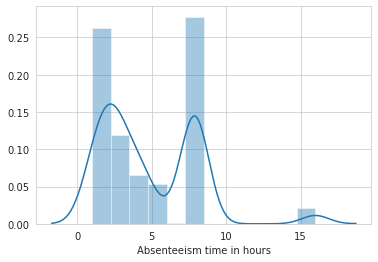

In [74]:
sns.distplot(DataCls['Absenteeism time in hours'])

In [0]:
DataCls = DataCls.drop(columns= ['Seasons',
                                 'Disciplinary failure','Education',
                                 'Social drinker','Social smoker','Son','Pet','Height'])

In [76]:
#Truning the problem into classification as regression not giving best results

DataCls = DataCls[DataCls['Absenteeism time in hours']<=10]#.round()
#DataCls['Absenteeism time in hours'] = DataCls['Absenteeism time in hours'].astype('category')
DataCls['Absenteeism time in hours'].value_counts()

8.000000    199
2.000000    155
3.000000    110
1.000000     88
4.000000     60
7.346041     58
4.780589     43
5.000000      7
7.000000      1
Name: Absenteeism time in hours, dtype: int64

In [0]:
#Divided target variable into 3 categories
DataCls['Absenteeism time in hours'] = pd.qcut(DataCls['Absenteeism time in hours'],2,labels = False)

In [78]:
DataCls['Absenteeism time in hours'].value_counts()

0    413
1    308
Name: Absenteeism time in hours, dtype: int64

In [0]:
DataCls['Absenteeism time in hours'] = DataCls['Absenteeism time in hours'].astype('category')

In [80]:
#Run classification on new dataset

DataCls = DoNormalization(DataCls)
xTrain,xTest,yTrain,yTest = CreateSample(DataCls)
ModellingAndEvaluationClassification(xTrain,xTest,yTrain,yTest)

#Here seems RandomForestClassifier gives the best result nearly 70%

ConfusionMatrices:-
LR  :
[[70  0]
 [75  0]]

DTC :
[[50 20]
 [25 50]]

RFC :
[[57 13]
 [25 50]]

KNN :
[[52 18]
 [55 20]]

GNB :
[[65  5]
 [42 33]]

Accuracy Scores:-
LR  : 0.4827586206896552
DTC : 0.6896551724137931
RFC : 0.7379310344827587
KNN : 0.496551724137931
GNB : 0.6758620689655173

Classification Reports:-
LR  :
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        70
           1       0.00      0.00      0.00        75

    accuracy                           0.48       145
   macro avg       0.24      0.50      0.33       145
weighted avg       0.23      0.48      0.31       145


DTC :
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        70
           1       0.71      0.67      0.69        75

    accuracy                           0.69       145
   macro avg       0.69      0.69      0.69       145
weighted avg       0.69      0.69      0.69       145


RFC :
        

## Changing problem to Classification
After checking with different regression and classification algoritms, it is concluded that the most of the data have bimodal distribution and the target variable is also bimodal. So the problem is converted to a 2 class classification problem and RandomForestClassifier gives 78% accuracy.

In [0]:
DataCls = EmpAb.copy()

In [0]:
# DataCls = EmpAbWithOutliers.copy()

In [83]:
#Truning the problem into classification as regression no giving best results

DataCls['Absenteeism time in hours'] = DataCls['Absenteeism time in hours'].astype('category')
DataCls['Absenteeism time in hours'] = DataCls['Absenteeism time in hours'].round()
DataCls['Absenteeism time in hours'].value_counts()

8.0     199
2.0     155
3.0     110
1.0      88
4.0      60
7.0      59
5.0      50
16.0     19
Name: Absenteeism time in hours, dtype: int64

In [0]:
#Divided target variable into 3 categories
DataCls['Absenteeism time in hours'] = pd.qcut(DataCls['Absenteeism time in hours'],2,labels = [1,2])

In [85]:
#Run classification on new dataset

DataCls = DoNormalization(DataCls)
xTrain,xTest,yTrain,yTest = CreateSample(DataCls)
ModellingAndEvaluationClassification(xTrain,xTest,yTrain,yTest)

#Here seems RandomForestClassifier gives the best result nearly 78%

ConfusionMatrices:-
LR  :
[[84  0]
 [64  0]]

DTC :
[[56 28]
 [13 51]]

RFC :
[[62 22]
 [10 54]]

KNN :
[[62 22]
 [32 32]]

GNB :
[[66 18]
 [27 37]]

Accuracy Scores:-
LR  : 0.5675675675675675
DTC : 0.722972972972973
RFC : 0.7837837837837838
KNN : 0.6351351351351351
GNB : 0.6959459459459459

Classification Reports:-
LR  :
              precision    recall  f1-score   support

           1       0.57      1.00      0.72        84
           2       0.00      0.00      0.00        64

    accuracy                           0.57       148
   macro avg       0.28      0.50      0.36       148
weighted avg       0.32      0.57      0.41       148


DTC :
              precision    recall  f1-score   support

           1       0.81      0.67      0.73        84
           2       0.65      0.80      0.71        64

    accuracy                           0.72       148
   macro avg       0.73      0.73      0.72       148
weighted avg       0.74      0.72      0.72       148


RFC :
        

## Monthly loss for the company

Beacause of high rate of absenteesim organization has to suffer decrease in revenu. Here the total cost due to absenteesim is calculated.

In [0]:
LossVar = ["Month of absence","Work load Average/day ","Service time","Absenteeism time in hours"]

Loss  = EmpAbWithOutliers[LossVar]
Loss["Loss"]=(Loss["Work load Average/day "]/Loss["Service time"])*Loss["Absenteeism time in hours"]


In [0]:
MonthlyLoss = Loss[["Month of absence","Loss"]]

In [0]:
MonthlyLoss['Loss'] = MonthlyLoss['Loss'].astype('int')

In [92]:
MonthlyLoss.groupby("Month of absence").sum()

,Loss
Month of absence,
1.0,6545209
2.0,8268517
3.0,17438951
4.0,11199316
5.0,11703039
6.0,15060213
7.0,19504727
8.0,9448448
9.0,8064383


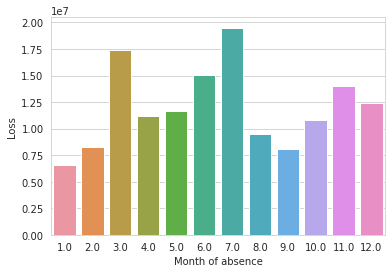

In [89]:
sns.barplot(data=MonthlyLoss,x='Month of absence',y='Loss',ci = None,estimator=sum)
